In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
df = pd.read_csv("../Resources/eight_year_cycle.csv")
df.head()

,country_code,country_name,year,co2_normalized,merge_id,male_death_rate,female_death_rate,cigarette_sales,gdp_normalized,co2_emissions_-8,...,cigarette_sales_-2,cigarette_sales_-1,GDP_-8,GDP_-7,GDP_-6,GDP_-5,GDP_-4,GDP_-3,GDP_-2,GDP_-1
0,ARM,Armenia,1998,0.121883,ARM_1998,38.05,5.43,5.7,584.384267,0.697225,...,5.6,5.6,634.560413,572.161763,356.082212,347.466463,389.825287,441.894002,484.091641,501.156515
1,AUS,Australia,1968,0.017502,AUS_1968,45.00,5.74,8.8,2723.999484,0.011467,...,8.9,8.5,1810.510249,1877.509803,1854.552575,1967.014259,2131.277657,2280.902108,2343.706917,2579.986340
2,AUS,Australia,1969,0.018494,AUS_1969,46.75,5.66,8.9,2991.241889,0.011777,...,8.5,8.8,1877.509803,1854.552575,1967.014259,2131.277657,2280.902108,2343.706917,2579.986340,2723.999484
3,AUS,Australia,1970,0.019191,AUS_1970,47.79,7.18,9.1,3304.678667,0.012339,...,8.8,8.9,1854.552575,1967.014259,2131.277657,2280.902108,2343.706917,2579.986340,2723.999484,2991.241889
4,AUS,Australia,1971,0.019861,AUS_1971,49.28,7.53,8.9,3494.973309,0.013134,...,8.9,9.1,1967.014259,2131.277657,2280.902108,2343.706917,2579.986340,2723.999484,2991.241889,3304.678667


In [2]:
df = df.drop(columns=['country_code', 'merge_id'])
df.columns

Index(['country_name', 'year', 'co2_normalized', 'male_death_rate',
       'female_death_rate', 'cigarette_sales', 'gdp_normalized',
       'co2_emissions_-8', 'co2_emissions_-7', 'co2_emissions_-6',
       'co2_emissions_-5', 'co2_emissions_-4', 'co2_emissions_-3',
       'co2_emissions_-2', 'co2_emissions_-1', 'cigarette_sales_-8',
       'cigarette_sales_-7', 'cigarette_sales_-6', 'cigarette_sales_-5',
       'cigarette_sales_-4', 'cigarette_sales_-3', 'cigarette_sales_-2',
       'cigarette_sales_-1', 'GDP_-8', 'GDP_-7', 'GDP_-6', 'GDP_-5', 'GDP_-4',
       'GDP_-3', 'GDP_-2', 'GDP_-1'],
      dtype='object')

In [3]:
dummies = pd.get_dummies(df['country_name'])
merged_df = pd.merge(df, dummies, left_index=True, right_index=True)
merged_df = merged_df.drop(columns='country_name')
# merged_df = df

In [4]:
# cigarette_columns = 'cigarette_sales_-8', 'cigarette_sales_-7', 'cigarette_sales_-6', 'cigarette_sales_-5', 'cigarette_sales_-4', 'cigarette_sales_-3', 'cigarette_sales_-2', 'cigarette_sales_-1'
# gdp_columns = 'GDP_-8', 'GDP_-7', 'GDP_-6', 'GDP_-5', 'GDP_-4', 'GDP_-3', 'GDP_-2', 'GDP_-1'
# co2_columns = 'co2_emissions_-8', 'co2_emissions_-7', 'co2_emissions_-6', 'co2_emissions_-5', 'co2_emissions_-4', 'co2_emissions_-3', 'co2_emissions_-2', 'co2_emissions_-1'



# # merged_df = merged_df.drop(columns=[gdp_columns])

# merged_df

In [5]:
# Split our preprocessed data into our features and target arrays
y = (merged_df['male_death_rate'] + merged_df['female_death_rate']) /2 
X = merged_df.drop(columns=['male_death_rate', 'female_death_rate'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
# Fit the model to the training data, and calculate the scores for the training and testing data.

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8343079859827311
Testing Score: 0.8047230032151542


In [27]:
# 'm' values
print(model.coef_)

# y-int
print(model.intercept_)

print(X.columns)


[ 3.12365291e-01  5.74452846e-01 -1.53627729e-01 -3.47840816e-05
  2.52531411e+00  1.32782859e+00 -1.76564105e+00  2.87478449e-01
 -5.82403501e-01  2.11636610e+00 -3.38494451e+00  1.00775099e+00
  1.24715995e+00  5.41909365e-01 -5.29480873e-02 -1.38490471e-01
  3.41469420e-01 -2.05256845e-01 -5.70172279e-02  1.37462554e-01
 -1.19116923e-04  2.28417250e-05 -1.09826404e-04  6.88586303e-05
 -4.86176586e-05 -5.38898170e-05  5.31772126e-05 -4.61256033e-05
  3.19744231e-14  4.03748317e-01  4.56410198e+00 -1.78153570e+01
  4.89564471e+00  6.15927905e+00 -5.54089991e+00  7.80474755e+00
  4.66323704e+00 -2.04679410e+00  1.16553738e+01  2.33970573e+00
  7.48855952e+00  1.06038188e+00 -1.85353511e+01 -3.29138794e+00
 -1.21880488e+00  1.38877083e+01  3.42867225e+00  4.72589474e+00
 -1.29934277e+01  4.43034171e+00 -1.25176110e+01  7.20638246e+00
 -1.50214749e+01  3.52622345e+00  5.25173404e-01 -1.16183084e+01
  5.48512415e+00  4.49680773e+00 -2.86810698e-01  3.91731833e+00
 -1.01175256e+01 -3.60794

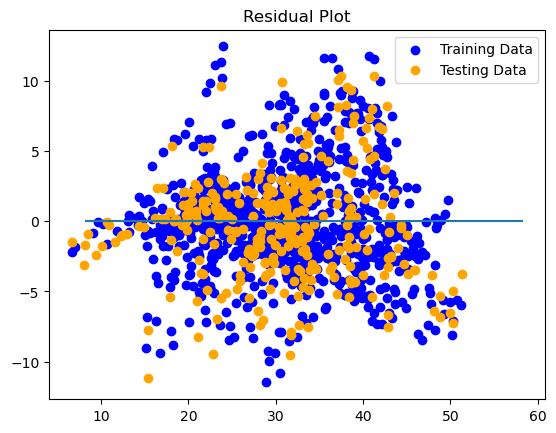

In [213]:
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()